In [1]:
from random import randint
from matplotlib import pyplot as plt
#some helper functions
#roll M-sided dice
def roll(M):
    return randint(1,M)

#Sort the outcomes of d throws of M-sided dice
def sorted_rolls(d, M):
    return sorted([roll(M) for x in range(d)], reverse = True)

#get sample average of a function over n executions
def EV(*args, n, fun):
    res = [fun(*args) for i in range(n)]
    return 1.0 * sum(res)/len(res)

The problem at hand is a dynamic programming one: Every throw you choose how many dice to freeze, and depending on that you get some points and replay the game with fewer dice. So all I need is to find the formula that connects expected payoff of the game with the expected payoffs of games with fewer dice. Here it is:

In [2]:
def game_step(F, N, M):
    L = sorted_rolls(N, M)
    return max([sum(L[0:d]) + F[N-d] for d in range(1,N+1)])

Where F is a vector of sorted rolls, N is the number of dice in the current round, and M is the number of sides on your dice.
To translate from code into English, every round you choose to freeze N dice, and your payoff is N highest dice you got plus the expected payoff of a game with N less dice. Going from 0-dice games upward, we can easily estimate the expected payoff for each N.

In [3]:
#Execute the strategy for all N
def roll_and_keep(N, M, n):
    F = [0] * (N+1)
    F[1] = EV(M, n = n, fun = roll) 
    for i in range(2, N+1):
        F[i] = EV(F, i, M, n = n, fun = game_step)
    return [round(f,2) for f in F]

In [4]:
F = roll_and_keep(10, 6, 1000000)

In [5]:
print(F)

[0, 3.5, 8.24, 13.43, 18.85, 24.44, 30.16, 35.96, 41.82, 47.71, 53.64]


Average payoff for N = 4 is {{F[4]}}, {{F[5]}} for N = 5, {{F[6]}} for N = 6, etc.

What's interesting (albeit intuitive) is that the more dice you have, the more value you can squeeze out of each dice with the roll-and-keep mechanic. And you approach the average of 6 points per dice really, really quickly!

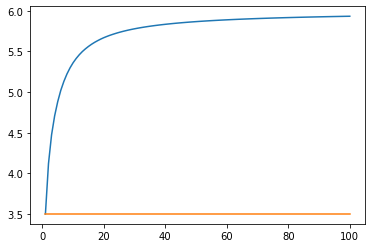

In [8]:
n = 100
rk = roll_and_keep(n, 6, 10000)
r = [3.5 for i in range(n+1)]
rk = [1.0*x/y for x,y in zip(rk[1:], range(1,n+1))]

plt.plot(range(1,n+1), rk)
plt.plot(range(1,n+1), r[1:])
plt.show()

Even at 10 dice you're already getting {{round(rk[9],2)}} points per dice as opposed to the average 3.5 points you get with regular rolls!

P.S. For analytical solution, start with this derivation of the pmf for what I called the best_rolls function - https://www.physicsforums.com/threads/puzzling-roll-x-dice-choose-y-highest-problem.418161/#post-2813034. I didn't even try to simplify our recurrent formula using this result, because it's way too messy.